In [3]:
import numpy as np
import pandas as pd 
import sys 

In [ ]:
'''
(1)创建k个点作为起始质心，可随机选择(位于数据边界内)
　　(2)当任意一个点的簇分配结果发生改变时
　　　　(3)对数据集中每一个点
　　　　　 (3.1)对每个质心
　　　　　　　a.计算质心与数据点之间的距离
              b.将数据点分配到距其最近的簇
　　　　(4)对每一个簇，计算簇中所有点的均值并将均值作为质心
'''

In [5]:
#计算两个向量之间的欧式距离
def calcDist(vecA,vecB):
    return np.sqrt(np.sum(np.power(vecA-vecB,2)))

In [65]:
#k-means算法的具体过程，k代表要进行聚类的类别数，需要事先设定
#clasterRes 聚类结果
#centers 质心坐标
def kmeans(dataSet,categoryNums):
    m,n = dataSet.shape #数据的维度
    clasterRes = np.zeros([m,2])
    clasterRes[:,1] = sys.maxsize
    #随机初始化k个质心，要在数据的特征值的边界范围之内
    centers = np.random.rand(categoryNums,n)
    for j in range(n):
        colMin = dataSet[:,j].min()#取一列最小值
        colRange = dataSet[:,j].max()- colMin #取一列数据的“取值范围”
        centers[:,j] = colMin + colRange*np.random.rand(1,categoryNums) #计算初始质心一列特征的取值
                                                                       #原始数据的特征值的边界范围之内，随机填充
    clasterChanged = True
    #若存在一个样本的聚类结果发生改变则继续聚类
    while clasterChanged:
        clasterChanged = False
        #将每一条样本对每个质心计算欧式距离，选取欧式距离最小的质心类别作为该调样本聚类的结果
        for i in range(m):
            minDsit = clasterRes[i,1] #该条样本最小的距离
            minIndex = 0#该条数据聚类结果       
            for j in range(categoryNums):
                dist = calcDist(centers[j,:],dataSet[i,:])
                if dist < minDsit:
                    minDsit = dist
                    minIndex = j
            if clasterRes[i,0] != minIndex:
                clasterRes[i] = minIndex,minDsit 
                clasterChanged = True#存在一条样本聚类结果发生改变
        #更新每个聚类中样本的质心
        if not clasterChanged :break
        for i in range(categoryNums):
            l =[j for j in range(m) if clasterRes[j,0] == i]
            centers[i,:]=dataSet[l].mean(axis=0)
    return clasterRes,centers

In [72]:
df = pd.read_csv('./data.csv')
data = df.drop(columns=['label'],axis = 1)

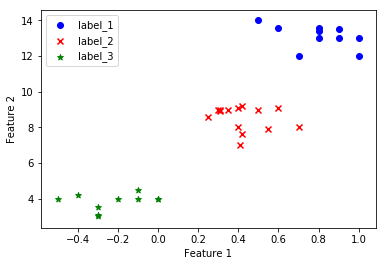

In [75]:
import matplotlib.pyplot as plt
# 作图  查看数据的分布情况
plt.scatter(df.loc[df['label']==0,'x1'].values, df.loc[df['label']==0,'x2'].values, color='blue', marker='o', label='label_1')
plt.scatter(df.loc[df['label']==1,'x1'].values, df.loc[df['label']==1,'x2'].values, color='red', marker='x', label='label_2')
plt.scatter(df.loc[df['label']==2,'x1'].values, df.loc[df['label']==2,'x2'].values, color='green', marker='*', label='label_3')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

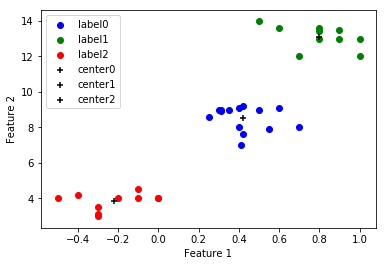

In [86]:
#进行预测
k =3
#clasterRes 聚类结果
#centers 质心坐标
clasterRes,centers = kmeans(data.values,k) 
df['pred'] = clasterRes[:,0]
#查看数据聚类后的情况
colorslist = ['blue','green','red']
for i in range(k):
    plt.scatter(df.loc[df['pred']==i,'x1'].values, df.loc[df['pred']==i,'x2'].values,color=colorslist[i],marker='o',label='label'+str(i))
#画出质心点
for i in range(k):
    plt.scatter(centers[i,0], centers[i,1], color='black', marker='+', label='center'+str(i))
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc = 'upper left')
plt.show()

+ 用简单的聚类算法数据准确率并不高，上面这个聚类后分类完全正确的结果是取运行了多次后最好的一次结果
+ 要想聚类效果较好，可以考虑二分k-means算法